# Distribución Multinomial
## Elecciones: Pronóstico y resultados
### Distribución de Votos en una Elección
Supongamos que estamos analizando los resultados de una pequeña elección en la que hay cuatro candidatos: A, B, C y D. Cada votante puede votar por uno de estos cuatro candidatos. Queremos modelar y analizar los resultados de la elección en una población de 1000 votantes, asumiendo que las probabilidades de votar por cada candidato son:

1. Candidato A: 30% de los votos

2. Candidato B: 25% de los votos

3. Candidato C: 25% de los votos

4. Candidato D: 20% de los votos

Resultados de la elección:
Candidato A: 699293 votos (27.97%)
Candidato B: 675792 votos (27.03%)
Candidato C: 550017 votos (22.00%)
Candidato D: 525274 votos (21.01%)
Votos en Blanco: 49624 votos (1.98%)


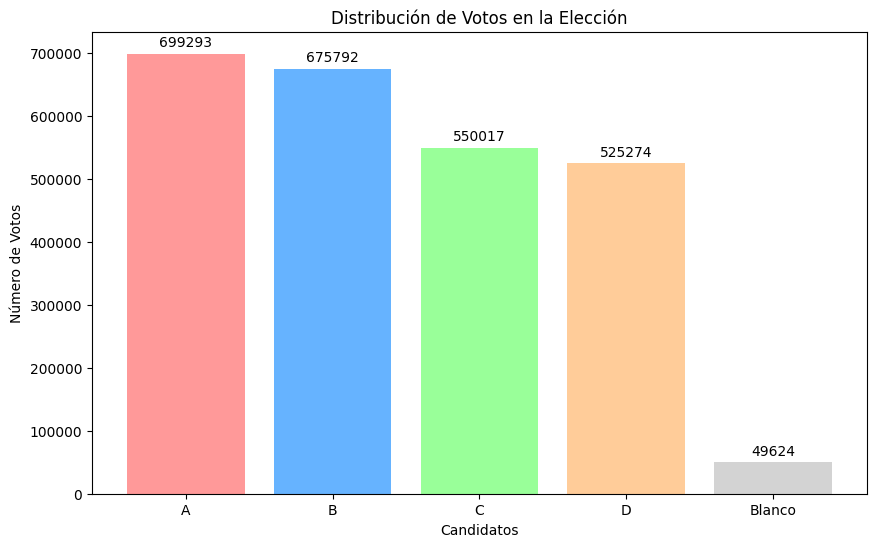

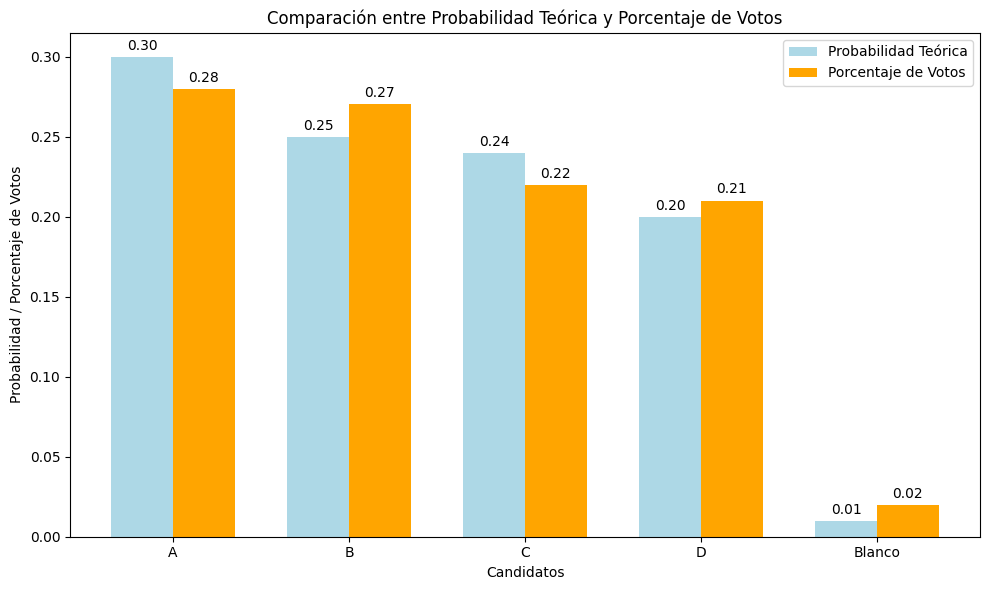

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

# Parámetros de la distribución multinomial
n = 2500000  # Número de votantes (2.5 millones)
p = [0.3, 0.25, 0.24, 0.20, 0.01]  # Probabilidades de votar por los candidatos A, B, C, D y votos en blanco

# Simulación de la distribución multinomial con mayor variación
# Vamos a perturbar ligeramente las probabilidades para generar variaciones
np.random.seed(42)  # Para reproducibilidad
resultados_perturbados = np.random.multinomial(n, [0.28, 0.27, 0.22, 0.21, 0.02])

# Calcular porcentajes de votos obtenidos
porcentajes = (resultados_perturbados / n) * 100

# Mostrar los resultados
print(f'Resultados de la elección:')
print(f'Candidato A: {resultados_perturbados[0]} votos ({porcentajes[0]:.2f}%)')
print(f'Candidato B: {resultados_perturbados[1]} votos ({porcentajes[1]:.2f}%)')
print(f'Candidato C: {resultados_perturbados[2]} votos ({porcentajes[2]:.2f}%)')
print(f'Candidato D: {resultados_perturbados[3]} votos ({porcentajes[3]:.2f}%)')
print(f'Votos en Blanco: {resultados_perturbados[4]} votos ({porcentajes[4]:.2f}%)')

# Gráfico de la distribución de votos
candidatos = ['A', 'B', 'C', 'D', 'Blanco']
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(candidatos, resultados_perturbados, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#d3d3d3'])

# Añadir etiquetas y título
ax1.set_xlabel('Candidatos')
ax1.set_ylabel('Número de Votos')
ax1.set_title('Distribución de Votos en la Elección')
for bar, votos in zip(bars, resultados_perturbados):
    height = bar.get_height()
    ax1.annotate(f'{votos}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de offset vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Gráfico comparativo entre distribución de probabilidades y porcentaje de votos
fig, ax2 = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(candidatos))

# Barras para la distribución de probabilidades
bars1 = ax2.bar(index, p, bar_width, label='Probabilidad Teórica', color='lightblue')

# Barras para el porcentaje real de votos obtenidos
bars2 = ax2.bar(index + bar_width, porcentajes/100, bar_width, label='Porcentaje de Votos', color='orange')

# Añadir etiquetas y título
ax2.set_xlabel('Candidatos')
ax2.set_ylabel('Probabilidad / Porcentaje de Votos')
ax2.set_title('Comparación entre Probabilidad Teórica y Porcentaje de Votos')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(candidatos)
ax2.legend()

# Añadir anotaciones a las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


_____________________________________